<a href="https://colab.research.google.com/github/tejaskarnani/OCR-digit/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

Loads a 3D array using the datasets function from the sklearn module.


In [ ]:
digits.images.shape

(1797, 8, 8)

Represents the dimensions of the 3D array digits.images, which contains binary representations of all digits


In [ ]:
print (digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


The binary representation of the image present at index 0 in the array digits. 

In [ ]:
import matplotlib.pyplot as plt


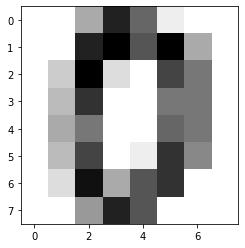

In [ ]:
plt.imshow(digits.images[0], cmap = "binary")

The image of the first element of the dataset, which we can see is a 0. Notice that we can also come to a rough estimation using the binary representation, considering 0s as white spaces, and larger integers as dark pixels.

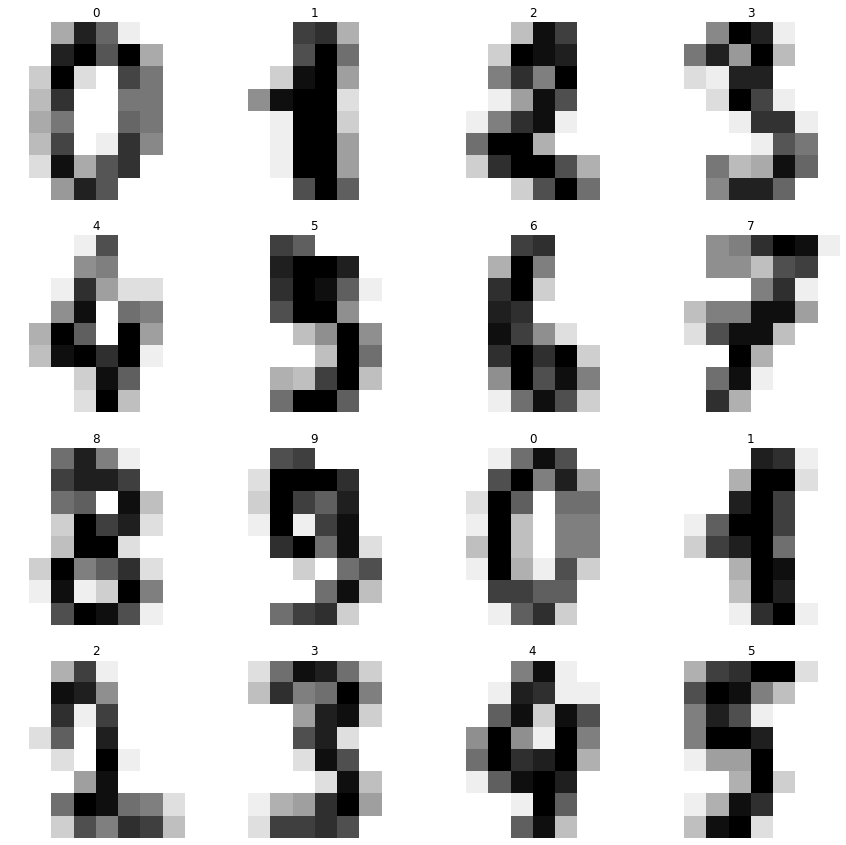

In [ ]:
def plot_multi(i):
  '''Plots 16 digits, starting with digit i'''
  nplots = 16
  fig = plt.figure(figsize=(15,15))
  for j in range(nplots):
    plt.subplot(4,4,j+1)
    plt.imshow(digits.images[i+j], cmap='binary')
    plt.title(digits.target[i+j])
    plt.axis('off')
  plt.show()

plot_multi(0)

This data, detailing the correct digit (on top of the image) corresponding to each image, is included with the dataset. We will use this data for the training of the system.

In [ ]:
y = digits.target
print(y.shape)
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797,)


(1797, 64)

The x array consisits of the images, whereas the y array consists of the corresponding correct digits.

In [ ]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The x and y arrays are split into two for training and testing- in that order.


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
solver='sgd', tol=1e-4, random_state=1,
learning_rate_init=.1, verbose=True)

MLPClassifier from scikit-learn offers several ML models, and here, I have used the simple Linear Regression Model, which I have also have worked with in my Math courses at school. Each of these variables can be tweaked for a wide range of purposes.

In [ ]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Using the Model we have defined before, and the corresponding x and y training arrays, the computer is trained. As it prints out, the model stops when the training loss does not improve beyond a set point (defined in the model)


In [ ]:
prediction = mlp.predict(x_test)

In [ ]:
prediction.shape

(797,)

The array prediction contains 797 elements. (Equal to x_test and y_test)

In [ ]:
prediction[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

This is the array of the first 50 predicted digits using the ML model



In [ ]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

The correct answers for the corresponding 50 digits.

In [ ]:
diff = prediction - y_test

`diff` is the difference in the predicted digits and the actual digits (for the entire sets)

In [ ]:
c = 0
for i in range (0,797):
  if diff[i] != 0:
    c += 1
print ("The accuracy of this model is ",1 - (c/797))

The accuracy of this model is  0.9146800501882058


Using the simple formula to calculate accuracy of a ML model, we find that this model gives a **91.47 % accuracy**